In [81]:
import pandas as pd
import numpy as np
%matplotlib inline

# Series


In [1]:
data = pd.Series([.25, 1, 0, .75, .5])
data

NameError: name 'pd' is not defined

In [18]:
data = pd.Series([.25, 1, 0, .75], index = ['a', 'b', 'c', 'd'])
data

a    0.25
b    1.00
c    0.00
d    0.75
dtype: float64

In [96]:
#works like a dictionary
data['b']

1.0

Speaker Note: We’ve seen a few ways of constructing a Pandas Series from scratch; all of them are some version of the following:

> pd.Series(data, index=index)

# Data Frames

In [22]:
pd.DataFrame(np.random.rand(3,2), columns=['these', 'columns'], index=['a', 'b', 'c'])

,these,columns
a,0.566340,0.886745
b,0.992145,0.262702
c,0.409963,0.076613


In [27]:
pd.DataFrame(np.random.rand(3,2), columns=['these', 'columns'])

,these,columns
0,0.893090,0.630907
1,0.930489,0.975496
2,0.617279,0.024909


In [ ]:
pd.DataFrame(np.ra)

### Speaker Note

Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by “aligned” we mean that they share the same index.
To demonstrate this, let’s first construct a new Series listing the area of each of the five states discussed in the previous section:

In [28]:
area = pd.Series({'California': 423967, 'Texas': 695662, 'New York': 141297,
                 'Florida': 170312, 'Illinois': 149995})

In [29]:
print(area)

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64


In [30]:
population = pd.Series({'California': 38332521,
                               'Texas': 26448193,
                               'New York': 19651127,
                               'Florida': 19552860,
                               'Illinois': 12882135})

In [31]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Now that we have this along with the population Series from before, we can use a
dictionary to construct a single two-dimensional object containing this information:


In [34]:
states = pd.DataFrame({'area':area, 'population':population})
states

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Bam.  You've got a DataFrame!

Next Slide:  And just like a Series, a DataFrame has an index

In [35]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [36]:
#And DataFrames have columns that you can now query
states.columns

Index(['area', 'population'], dtype='object')

Some say a good way to think of a DataFrame as a specialized dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data. For example, asking for the 'area' attribute returns the Series object containing the areas we saw earlier:

In [38]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [56]:
#Once you have a DataFrame, you can quickly start to do some interesting things.  For example, adding a column:

states['density'] = states['population']/states['area']
states

,area,population,Density,density
California,423967,38332521,90.413926,90.413926
Texas,695662,26448193,38.018740,38.018740
New York,141297,19651127,139.076746,139.076746
Florida,170312,19552860,114.806121,114.806121
Illinois,149995,12882135,85.883763,85.883763


In [97]:
#you can index using loc, iloc, and ix - iloc accesses the underlying index.  loc gets the explicit.
#NOTE: Indexing refers to columns, Slicing refers to rows

states.iloc[:2, :1]

,area
California,423967
Texas,695662


In [49]:
states.loc[:'New York', :'population']

,area,population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [59]:
states['Texas':'Florida']

,area,population,Density,density
Texas,695662,26448193,38.018740,38.018740
New York,141297,19651127,139.076746,139.076746
Florida,170312,19552860,114.806121,114.806121


In [60]:
states[1:3]

,area,population,Density,density
Texas,695662,26448193,38.018740,38.018740
New York,141297,19651127,139.076746,139.076746


### Slicing: warning - potential confusion
Notice that when you are slicing with an explicit index (i.e., data['a':'c']), the final index is included in the slice, while when you’re slicing with an implicit index (i.e., data[0:2]), the final index is excluded from the slice.

In [55]:
#Again, thinking of this as a 2-D Array, you can do some array like things.  For example, should the need arise, you can easily transpose the data.
states

,area,population,Density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [53]:
states.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
population,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
Density,1.106024e-02,2.630282e-02,7.190275e-03,8.710337e-03,1.164364e-02


In [58]:
#Similar to Numpy, you can grab based on certain criteria.  For example:
states.loc[states.density < 100, ['population', 'density'] ]

,population,density
California,38332521,90.413926
Texas,26448193,38.018740
Illinois,12882135,85.883763


#### Student Exercise
Generate a data frame and practice a few ways of slicing the data


# Summarizing Datasets
Pandas gives simple tools that one can use to quickly summarize and understand the data that they're working with.  For this next section, we'll pull in the famous Titanic dataset.  Let's take a look quickly, how to do that:

For the next data section, we'll pull down the titanic data set in your Jupyter notebook.  Conveniently, it's already pre-populated in the Jupyter notebook, but lets' take a look quickly at the command: 
### train = pandas.read_csv('train.csv')

Here, we're telling Pandas to read the train CSV and set it to the variable titanic.  We're then making it an object, setting it to the variable, titanic, so we can manipulate and run operations on it.

In [72]:
train = pd.read_csv('train.csv')


In [75]:
#The .head function gives us a quick look at the contents of our data.  
#If you're familiar with SQL and the SQL Pro reader, thi is akin to the summary function or a SELECT (*), LIMIT 5
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
#.info() function will give you a look at the shape and size, as well as datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [77]:
#You can even grab statistical summaries with the .describe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
#One that I find quite useful is ValueCounts.  
#With one command, you can quickly see an accounting of counts across values.  For those familiar with SQL, this is
#similar to a count and group by function
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [101]:
#If we want to get a bit more tricky, we can isolate a binary outcome or value like Survived, yes or no. In this case, represented by 1 or 0.
#We then can group it against a characteristic like sex to generate some quick insight.  By grouping, and then taking the mean
#we can quickly see survival rates by sex.
train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

#### Student Exercise - group() function
What other things might we group by?  Can anyone tell me the survival rate for 3rd Class ticket holders?  Does there appear to be any obvious correlation between ticket class and survival rate?

### Summarizing with plots


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

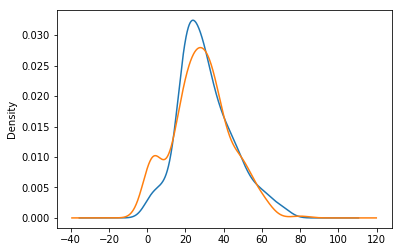

In [82]:
#If you want to look at something more nuanced, you can again group, and visualize with a simple plot.
train.groupby('Survived').Age.plot(kind='kde')

## Handling Missing Data
The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of data missing. And while this is true,

>  Firstly, understand that there is NO good way to deal with missing data.
    - Alvira Swalin

That being said, there are three ways to deal with missing data:
1. Do nothing
2. Removal
3. Imputation

Pandas uses two mostly interchangeable conventions when alerting to missing data - **none** and **NaN** (not a number). 
<br>


There are several methods for detecting, removing, and replacing null values in Pandas data structures. They are:

<br>**isnull()**
Generate a Boolean mask indicating missing values (list of true/false)

<br>**notnull()**
Opposite of isnull()

<br>**dropna()**
Return a filtered version of the data (drops null value fields - array, drops rows with any null value or columns if specified)

<br>**fillna()**
Return a copy of the data with missing values filled.


In [139]:
#To illustrate quickly, we can create an array with a few missing entries
exs = pd.Series([1, np.nan, 3.2, None])

In [141]:
#You can use this to give you a boolean
exs.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [140]:
#Or you can use this to slice
exs[exs.notnull()]

0    1.0
2    3.2
dtype: float64

In [131]:
df = pd.DataFrame([[6, np.nan, 2, np.nan],
                   [2,  3,  5, np.nan],
                   [np.nan, 4, 7, 8]])
df

,0,1,2,3
0,6.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,7,8.0


In [132]:
df.dropna()

,0,1,2,3


In [133]:
df.dropna(axis='columns')

,2
0,2
1,5
2,7


As you can see, these functions are fairly binary - all or nothing.  Like general anesthesia, sometimes you want something a bit more specific.  But how to decide?  In his paper, **Tidy Data**, Hadley Wickham gives us some direction.  When discussing such considerations for a particular data set, he says:

> In this experiment, the missing value represents an observation that should have
been made, but wasn’t, so it’s important to keep it. Structural missing values, which represent
measurements that can’t be made (e.g., the count of pregnant males) can be safely removed.
                                                        - Hadley Wickham (Tidy Data)

Thankfully, when removing data, Pandas gives us tooling with a bit finer control. Instead of dropping the default 'any' rows or columns containing null values, we can specify certain thresholds for
exclusion or removal.

In [130]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN
2,NaN,4.0,7,8.0


Typically, 

In [71]:
#Detecting Null values.  Using .sum, you can generate a summary description of your data set.  Here, let's take a look.
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We cannot drop single values from a DataFrame; we can only drop full rows or full columns.

>  the missing value represents an observation that should have
been made, but wasn’t, so it’s important to keep it. Structural missing values, which represent
measurements that can’t be made (e.g., the count of pregnant males) can be safely removed.

We can fill NA entries with a single value, such as zero:
    In[24]: data.fillna(0)
    Out[24]: a    1.0
             b    0.0
             c    2.0
             d    0.0
             e    3.0
             dtype: float64
             
   Left off Page 127